In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
df = pd.read_csv("LCA-2021.csv")

C:\Users\warre\AppData\Local\Temp\ipykernel_25856\225543427.py:1: DtypeWarning: Columns (5,6,16,19,85,101,102) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("LCA-2021.csv")


# EXPLORATORY DATA ANALYSIS

In [3]:
df.shape[0]

100368

In [4]:
df.shape[1]

154

In [5]:
df.head()

,CASE_NUMBER,CASE_STATUS,RECEIVED_DATE,DECISION_DATE,REFILE,ORIG_FILE_DATE,PREVIOUS_SWA_CASE_NUMBER_STATE,SCHD_A_SHEEPHERDER,EMPLOYER_NAME,EMPLOYER_ADDRESS_1,...,FOREIGN_WORKER_ALT_OCC_EXP,FOREIGN_WORKER_EXP_WITH_EMPL,FOREIGN_WORKER_EMPL_PAY_FOR_ED,FOREIGN_WORKER_CURR_EMPLOYED,EMPLOYER_COMPLETED_APPLICATION,PREPARER_NAME,PREPARER_TITLE,PREPARER_EMAIL,EMP_INFO_DECL_NAME,EMP_DECL_TITLE
0,A-19178-24147,Withdrawn,6/27/2019,10/1/2020,N,NaN,NaN,N,Ennovaco Corp,5600 NW 72nd AVE,...,NaN,N,N,Y,Y,,NaN,NaN,ADRIANA MOYANO,CEO
1,A-19198-32049,Denied,7/17/2019,10/1/2020,N,NaN,NaN,N,"CAPGEMINI AMERICA, INC.",333 W. WACKER DRIVE,...,Y,N,N,Y,N,Timothy G Payne,Partner,tpayne@sidley.com,Laura Heino,Supervising Associate
2,A-19224-43106,Certified-Expired,12/16/2019,10/1/2020,N,NaN,NaN,N,APPLE INC.,ONE APPLE PARK WAY,...,NaN,N,N,Y,N,Judy H Wong,Attorney,apple-usimm@fragomen.com,LorraineMarshaDebrina GallagherWatkinsWashington,Global Imm Mgr U.S. Imm Mgr Imm Project Mgr
3,A-19248-53820,Certified-Expired,12/16/2019,10/1/2020,N,NaN,NaN,N,APPLE INC.,ONE APPLE PARK WAY,...,NaN,N,N,Y,N,NOEL P CHAVEZ,ATTORNEY,apple-usimm@fragomen.com,LorraineMarshaDebrina GallagherWatkinsWashington,Global Imm MgrUS Immigration MgrImm Proj Mgr
4,A-19252-55077,Certified-Expired,12/11/2019,10/1/2020,N,NaN,NaN,N,AON BENFIELD INC.,200 EAST RANDOLPH STREEET,...,Y,N,Y,Y,N,Erin L Hogan,Attorney,erin.hogan@quarles.com,Elizabeth McAdams,"Senior Manager, Global Immigration"


In [6]:
df["CASE_STATUS"].unique()

array(['Withdrawn', 'Denied', 'Certified-Expired', 'Certified'],
      dtype=object)

In [7]:
df = df [["CASE_STATUS","EMPLOYER_NAME","EMPLOYER_STATE_PROVINCE","EMPLOYER_NUM_EMPLOYEES",
          "PW_SOC_TITLE","PW_SKILL_LEVEL","PW_WAGE","PW_UNIT_OF_PAY",
         "WAGE_OFFER_FROM","WAGE_OFFER_TO","WAGE_OFFER_UNIT_OF_PAY",
         "LAYOFF_IN_PAST_SIX_MONTHS","FOREIGN_WORKER_BIRTH_COUNTRY",
          "CLASS_OF_ADMISSION",
          "FOREIGN_WORKER_EDUCATION","FOREIGN_WORKER_INFO_MAJOR",
         "APP_FOR_COLLEGE_U_TEACHER"]]

In [8]:
df.isnull().any()

CASE_STATUS                     False
EMPLOYER_NAME                   False
EMPLOYER_STATE_PROVINCE          True
EMPLOYER_NUM_EMPLOYEES           True
PW_SOC_TITLE                     True
PW_SKILL_LEVEL                   True
PW_WAGE                          True
PW_UNIT_OF_PAY                   True
WAGE_OFFER_FROM                  True
WAGE_OFFER_TO                    True
WAGE_OFFER_UNIT_OF_PAY           True
LAYOFF_IN_PAST_SIX_MONTHS        True
FOREIGN_WORKER_BIRTH_COUNTRY     True
CLASS_OF_ADMISSION               True
FOREIGN_WORKER_EDUCATION         True
FOREIGN_WORKER_INFO_MAJOR        True
APP_FOR_COLLEGE_U_TEACHER        True
dtype: bool

In [9]:
df.isnull().sum()

CASE_STATUS                         0
EMPLOYER_NAME                       0
EMPLOYER_STATE_PROVINCE             1
EMPLOYER_NUM_EMPLOYEES             10
PW_SOC_TITLE                       10
PW_SKILL_LEVEL                   4856
PW_WAGE                            12
PW_UNIT_OF_PAY                     12
WAGE_OFFER_FROM                     7
WAGE_OFFER_TO                   62727
WAGE_OFFER_UNIT_OF_PAY              7
LAYOFF_IN_PAST_SIX_MONTHS           2
FOREIGN_WORKER_BIRTH_COUNTRY        4
CLASS_OF_ADMISSION               7549
FOREIGN_WORKER_EDUCATION            5
FOREIGN_WORKER_INFO_MAJOR       11403
APP_FOR_COLLEGE_U_TEACHER           6
dtype: int64

In [10]:
df.isnull().sum().sum()

86611

In [11]:
df = df[df["APP_FOR_COLLEGE_U_TEACHER"] == "N"]


In [12]:
df.head()

,CASE_STATUS,EMPLOYER_NAME,EMPLOYER_STATE_PROVINCE,EMPLOYER_NUM_EMPLOYEES,PW_SOC_TITLE,PW_SKILL_LEVEL,PW_WAGE,PW_UNIT_OF_PAY,WAGE_OFFER_FROM,WAGE_OFFER_TO,WAGE_OFFER_UNIT_OF_PAY,LAYOFF_IN_PAST_SIX_MONTHS,FOREIGN_WORKER_BIRTH_COUNTRY,CLASS_OF_ADMISSION,FOREIGN_WORKER_EDUCATION,FOREIGN_WORKER_INFO_MAJOR,APP_FOR_COLLEGE_U_TEACHER
0,Withdrawn,Ennovaco Corp,FLORIDA,6.0,Bookkeeper,Level III,"$40,227.00",Year,"$40,227.00",NaN,Year,N,VENEZUELA,B-2,Bachelor's,INDUSTRIAL RELATIONS,N
1,Denied,"CAPGEMINI AMERICA, INC.",ILLINOIS,14000.0,"Software Developers, Applications",Level III,"$96,658.00",Year,"$97,000.00","$148,000.00",Year,Y,INDIA,H-1B,Bachelor's,ELECTRONICS AND COMMUNICATION ENGINEERING,N
2,Certified-Expired,APPLE INC.,CALIFORNIA,137000.0,"Software Developers, Systems Software",Level I,"$96,325.00",Year,"$146,000.00","$170,400.00",Year,N,CHINA,H-1B,Bachelor's,COMPUTER ENGINEERING,N
3,Certified-Expired,APPLE INC.,CALIFORNIA,132000.0,"Electronics Engineers, Except Computer",Level II,"$111,634.00",Year,"$134,888.00","$170,400.00",Year,N,SOUTH KOREA,H-1B,Doctorate,COMPUTER ENGINEERING,N
4,Certified-Expired,AON BENFIELD INC.,ILLINOIS,50000.0,Actuaries,Level IV,"$122,138.00",Year,"$190,000.00",NaN,Year,N,UNITED KINGDOM,H-1B,Bachelor's,MATHEMATICS,N


In [13]:
df.shape[0]

98163

In [14]:
df["WAGE_OFFER_TO"].fillna(df["WAGE_OFFER_FROM"],inplace=True)

In [15]:
df.head()

,CASE_STATUS,EMPLOYER_NAME,EMPLOYER_STATE_PROVINCE,EMPLOYER_NUM_EMPLOYEES,PW_SOC_TITLE,PW_SKILL_LEVEL,PW_WAGE,PW_UNIT_OF_PAY,WAGE_OFFER_FROM,WAGE_OFFER_TO,WAGE_OFFER_UNIT_OF_PAY,LAYOFF_IN_PAST_SIX_MONTHS,FOREIGN_WORKER_BIRTH_COUNTRY,CLASS_OF_ADMISSION,FOREIGN_WORKER_EDUCATION,FOREIGN_WORKER_INFO_MAJOR,APP_FOR_COLLEGE_U_TEACHER
0,Withdrawn,Ennovaco Corp,FLORIDA,6.0,Bookkeeper,Level III,"$40,227.00",Year,"$40,227.00","$40,227.00",Year,N,VENEZUELA,B-2,Bachelor's,INDUSTRIAL RELATIONS,N
1,Denied,"CAPGEMINI AMERICA, INC.",ILLINOIS,14000.0,"Software Developers, Applications",Level III,"$96,658.00",Year,"$97,000.00","$148,000.00",Year,Y,INDIA,H-1B,Bachelor's,ELECTRONICS AND COMMUNICATION ENGINEERING,N
2,Certified-Expired,APPLE INC.,CALIFORNIA,137000.0,"Software Developers, Systems Software",Level I,"$96,325.00",Year,"$146,000.00","$170,400.00",Year,N,CHINA,H-1B,Bachelor's,COMPUTER ENGINEERING,N
3,Certified-Expired,APPLE INC.,CALIFORNIA,132000.0,"Electronics Engineers, Except Computer",Level II,"$111,634.00",Year,"$134,888.00","$170,400.00",Year,N,SOUTH KOREA,H-1B,Doctorate,COMPUTER ENGINEERING,N
4,Certified-Expired,AON BENFIELD INC.,ILLINOIS,50000.0,Actuaries,Level IV,"$122,138.00",Year,"$190,000.00","$190,000.00",Year,N,UNITED KINGDOM,H-1B,Bachelor's,MATHEMATICS,N


In [16]:
df.isnull().sum().sum()

23383

In [17]:
df = df.dropna()

In [18]:
df.isnull().sum().sum()

0

In [19]:
df.loc[df["CASE_STATUS"] == "Certified-Expired", "CASE_STATUS"] = "Certified"

In [20]:
df.head()

,CASE_STATUS,EMPLOYER_NAME,EMPLOYER_STATE_PROVINCE,EMPLOYER_NUM_EMPLOYEES,PW_SOC_TITLE,PW_SKILL_LEVEL,PW_WAGE,PW_UNIT_OF_PAY,WAGE_OFFER_FROM,WAGE_OFFER_TO,WAGE_OFFER_UNIT_OF_PAY,LAYOFF_IN_PAST_SIX_MONTHS,FOREIGN_WORKER_BIRTH_COUNTRY,CLASS_OF_ADMISSION,FOREIGN_WORKER_EDUCATION,FOREIGN_WORKER_INFO_MAJOR,APP_FOR_COLLEGE_U_TEACHER
0,Withdrawn,Ennovaco Corp,FLORIDA,6.0,Bookkeeper,Level III,"$40,227.00",Year,"$40,227.00","$40,227.00",Year,N,VENEZUELA,B-2,Bachelor's,INDUSTRIAL RELATIONS,N
1,Denied,"CAPGEMINI AMERICA, INC.",ILLINOIS,14000.0,"Software Developers, Applications",Level III,"$96,658.00",Year,"$97,000.00","$148,000.00",Year,Y,INDIA,H-1B,Bachelor's,ELECTRONICS AND COMMUNICATION ENGINEERING,N
2,Certified,APPLE INC.,CALIFORNIA,137000.0,"Software Developers, Systems Software",Level I,"$96,325.00",Year,"$146,000.00","$170,400.00",Year,N,CHINA,H-1B,Bachelor's,COMPUTER ENGINEERING,N
3,Certified,APPLE INC.,CALIFORNIA,132000.0,"Electronics Engineers, Except Computer",Level II,"$111,634.00",Year,"$134,888.00","$170,400.00",Year,N,SOUTH KOREA,H-1B,Doctorate,COMPUTER ENGINEERING,N
4,Certified,AON BENFIELD INC.,ILLINOIS,50000.0,Actuaries,Level IV,"$122,138.00",Year,"$190,000.00","$190,000.00",Year,N,UNITED KINGDOM,H-1B,Bachelor's,MATHEMATICS,N


In [21]:
df = df[df["CASE_STATUS"]!="Withdrawn"]

In [22]:
df

,CASE_STATUS,EMPLOYER_NAME,EMPLOYER_STATE_PROVINCE,EMPLOYER_NUM_EMPLOYEES,PW_SOC_TITLE,PW_SKILL_LEVEL,PW_WAGE,PW_UNIT_OF_PAY,WAGE_OFFER_FROM,WAGE_OFFER_TO,WAGE_OFFER_UNIT_OF_PAY,LAYOFF_IN_PAST_SIX_MONTHS,FOREIGN_WORKER_BIRTH_COUNTRY,CLASS_OF_ADMISSION,FOREIGN_WORKER_EDUCATION,FOREIGN_WORKER_INFO_MAJOR,APP_FOR_COLLEGE_U_TEACHER
1,Denied,"CAPGEMINI AMERICA, INC.",ILLINOIS,14000.0,"Software Developers, Applications",Level III,"$96,658.00",Year,"$97,000.00","$148,000.00",Year,Y,INDIA,H-1B,Bachelor's,ELECTRONICS AND COMMUNICATION ENGINEERING,N
2,Certified,APPLE INC.,CALIFORNIA,137000.0,"Software Developers, Systems Software",Level I,"$96,325.00",Year,"$146,000.00","$170,400.00",Year,N,CHINA,H-1B,Bachelor's,COMPUTER ENGINEERING,N
3,Certified,APPLE INC.,CALIFORNIA,132000.0,"Electronics Engineers, Except Computer",Level II,"$111,634.00",Year,"$134,888.00","$170,400.00",Year,N,SOUTH KOREA,H-1B,Doctorate,COMPUTER ENGINEERING,N
4,Certified,AON BENFIELD INC.,ILLINOIS,50000.0,Actuaries,Level IV,"$122,138.00",Year,"$190,000.00","$190,000.00",Year,N,UNITED KINGDOM,H-1B,Bachelor's,MATHEMATICS,N
5,Certified,APPLE INC.,CALIFORNIA,137000.0,"Electronics Engineers, Except Computer",Level II,"$111,634.00",Year,"$146,000.00","$173,300.00",Year,N,CHINA,H-1B,Master's,AERONAUTICS AND ASTRONAUTICS,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100346,Certified,CALIPER CORPORATION,MASSACHUSETTS,40.0,"Software Developers, Applications",Level II,"$96,242.00",Year,"$125,000.00","$135,000.00",Year,N,VIETNAM,F-1,Master's,COMPUTER SCIENCE,N
100347,Certified,YURZ INC,CALIFORNIA,1.0,Accountants,Level II,"$64,750.00",Year,"$70,000.00","$70,000.00",Year,N,CHINA,H-1B,Master's,ACCOUNTING,N
100348,Certified,TOTAL PRODUCE USA HOLDINGS,CALIFORNIA,9.0,Lawyers,Level II,"$128,752.00",Year,"$128,752.00","$133,752.00",Year,N,UNITED KINGDOM,H-1B,Bachelor's,BACHELOR OF LAWS EEE BACHELOR OF ARTS DEGREE I...,N
100349,Certified,"CADENCE DESIGN SYSTEMS, INC.",CALIFORNIA,3043.0,"Electronics Engineers, Except Computer",Level IV,"$157,539.00",Year,"$174,750.00","$194,750.00",Year,N,GERMANY,H-1B,Master's,ELECTRICAL ENGINEERING AND COMPUTER SCIENCE,N


In [23]:
df.loc[df["PW_SKILL_LEVEL"] == "Level I", "PW_SKILL_LEVEL"] = 0
df.loc[df["PW_SKILL_LEVEL"] == "Level II", "PW_SKILL_LEVEL"] = 1/3
df.loc[df["PW_SKILL_LEVEL"] == "Level III", "PW_SKILL_LEVEL"] = 2/3
df.loc[df["PW_SKILL_LEVEL"] == "Level IV", "PW_SKILL_LEVEL"] = 1

In [24]:
df = df.drop(['APP_FOR_COLLEGE_U_TEACHER'], axis=1)

In [25]:
df

,CASE_STATUS,EMPLOYER_NAME,EMPLOYER_STATE_PROVINCE,EMPLOYER_NUM_EMPLOYEES,PW_SOC_TITLE,PW_SKILL_LEVEL,PW_WAGE,PW_UNIT_OF_PAY,WAGE_OFFER_FROM,WAGE_OFFER_TO,WAGE_OFFER_UNIT_OF_PAY,LAYOFF_IN_PAST_SIX_MONTHS,FOREIGN_WORKER_BIRTH_COUNTRY,CLASS_OF_ADMISSION,FOREIGN_WORKER_EDUCATION,FOREIGN_WORKER_INFO_MAJOR
1,Denied,"CAPGEMINI AMERICA, INC.",ILLINOIS,14000.0,"Software Developers, Applications",0.666667,"$96,658.00",Year,"$97,000.00","$148,000.00",Year,Y,INDIA,H-1B,Bachelor's,ELECTRONICS AND COMMUNICATION ENGINEERING
2,Certified,APPLE INC.,CALIFORNIA,137000.0,"Software Developers, Systems Software",0,"$96,325.00",Year,"$146,000.00","$170,400.00",Year,N,CHINA,H-1B,Bachelor's,COMPUTER ENGINEERING
3,Certified,APPLE INC.,CALIFORNIA,132000.0,"Electronics Engineers, Except Computer",0.333333,"$111,634.00",Year,"$134,888.00","$170,400.00",Year,N,SOUTH KOREA,H-1B,Doctorate,COMPUTER ENGINEERING
4,Certified,AON BENFIELD INC.,ILLINOIS,50000.0,Actuaries,1,"$122,138.00",Year,"$190,000.00","$190,000.00",Year,N,UNITED KINGDOM,H-1B,Bachelor's,MATHEMATICS
5,Certified,APPLE INC.,CALIFORNIA,137000.0,"Electronics Engineers, Except Computer",0.333333,"$111,634.00",Year,"$146,000.00","$173,300.00",Year,N,CHINA,H-1B,Master's,AERONAUTICS AND ASTRONAUTICS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100346,Certified,CALIPER CORPORATION,MASSACHUSETTS,40.0,"Software Developers, Applications",0.333333,"$96,242.00",Year,"$125,000.00","$135,000.00",Year,N,VIETNAM,F-1,Master's,COMPUTER SCIENCE
100347,Certified,YURZ INC,CALIFORNIA,1.0,Accountants,0.333333,"$64,750.00",Year,"$70,000.00","$70,000.00",Year,N,CHINA,H-1B,Master's,ACCOUNTING
100348,Certified,TOTAL PRODUCE USA HOLDINGS,CALIFORNIA,9.0,Lawyers,0.333333,"$128,752.00",Year,"$128,752.00","$133,752.00",Year,N,UNITED KINGDOM,H-1B,Bachelor's,BACHELOR OF LAWS EEE BACHELOR OF ARTS DEGREE I...
100349,Certified,"CADENCE DESIGN SYSTEMS, INC.",CALIFORNIA,3043.0,"Electronics Engineers, Except Computer",1,"$157,539.00",Year,"$174,750.00","$194,750.00",Year,N,GERMANY,H-1B,Master's,ELECTRICAL ENGINEERING AND COMPUTER SCIENCE


In [26]:
df1 = df.drop_duplicates(subset = ["PW_UNIT_OF_PAY"])

In [27]:
df1["PW_UNIT_OF_PAY"]

1             Year
795           Hour
24585    Bi-Weekly
58235         Week
Name: PW_UNIT_OF_PAY, dtype: object

In [28]:
df['PW_WAGE'] = df['PW_WAGE'].apply(lambda s: s[1:].replace(',' , ''))
df['WAGE_OFFER_FROM'] = df['WAGE_OFFER_FROM'].apply(lambda s: s[1:].replace(',' , ''))
df['WAGE_OFFER_TO'] = df['WAGE_OFFER_TO'].apply(lambda s: s[1:].replace(',' , ''))

In [29]:
df["PW_WAGE"] = df["PW_WAGE"].astype('float64')
df["WAGE_OFFER_FROM"] = df["WAGE_OFFER_FROM"].astype('float64')
df["WAGE_OFFER_TO"] = df["WAGE_OFFER_TO"].astype('float64')

In [30]:
df.dtypes

CASE_STATUS                      object
EMPLOYER_NAME                    object
EMPLOYER_STATE_PROVINCE          object
EMPLOYER_NUM_EMPLOYEES          float64
PW_SOC_TITLE                     object
PW_SKILL_LEVEL                   object
PW_WAGE                         float64
PW_UNIT_OF_PAY                   object
WAGE_OFFER_FROM                 float64
WAGE_OFFER_TO                   float64
WAGE_OFFER_UNIT_OF_PAY           object
LAYOFF_IN_PAST_SIX_MONTHS        object
FOREIGN_WORKER_BIRTH_COUNTRY     object
CLASS_OF_ADMISSION               object
FOREIGN_WORKER_EDUCATION         object
FOREIGN_WORKER_INFO_MAJOR        object
dtype: object

In [31]:
df["YEARLY_RATE"] = 0
df.loc[df["PW_UNIT_OF_PAY"] == "Year", "YEARLY_RATE"] = df["PW_WAGE"]*1
df.loc[df["PW_UNIT_OF_PAY"] == "Hour", "YEARLY_RATE"] = df["PW_WAGE"]*40*52
df.loc[df["PW_UNIT_OF_PAY"] == "Bi-Weekly", "YEARLY_RATE"] = df["PW_WAGE"]*26
df.loc[df["PW_UNIT_OF_PAY"] == "Week", "YEARLY_RATE"] = df["PW_WAGE"]*52

In [32]:
df

,CASE_STATUS,EMPLOYER_NAME,EMPLOYER_STATE_PROVINCE,EMPLOYER_NUM_EMPLOYEES,PW_SOC_TITLE,PW_SKILL_LEVEL,PW_WAGE,PW_UNIT_OF_PAY,WAGE_OFFER_FROM,WAGE_OFFER_TO,WAGE_OFFER_UNIT_OF_PAY,LAYOFF_IN_PAST_SIX_MONTHS,FOREIGN_WORKER_BIRTH_COUNTRY,CLASS_OF_ADMISSION,FOREIGN_WORKER_EDUCATION,FOREIGN_WORKER_INFO_MAJOR,YEARLY_RATE
1,Denied,"CAPGEMINI AMERICA, INC.",ILLINOIS,14000.0,"Software Developers, Applications",0.666667,96658.0,Year,97000.0,148000.0,Year,Y,INDIA,H-1B,Bachelor's,ELECTRONICS AND COMMUNICATION ENGINEERING,96658.0
2,Certified,APPLE INC.,CALIFORNIA,137000.0,"Software Developers, Systems Software",0,96325.0,Year,146000.0,170400.0,Year,N,CHINA,H-1B,Bachelor's,COMPUTER ENGINEERING,96325.0
3,Certified,APPLE INC.,CALIFORNIA,132000.0,"Electronics Engineers, Except Computer",0.333333,111634.0,Year,134888.0,170400.0,Year,N,SOUTH KOREA,H-1B,Doctorate,COMPUTER ENGINEERING,111634.0
4,Certified,AON BENFIELD INC.,ILLINOIS,50000.0,Actuaries,1,122138.0,Year,190000.0,190000.0,Year,N,UNITED KINGDOM,H-1B,Bachelor's,MATHEMATICS,122138.0
5,Certified,APPLE INC.,CALIFORNIA,137000.0,"Electronics Engineers, Except Computer",0.333333,111634.0,Year,146000.0,173300.0,Year,N,CHINA,H-1B,Master's,AERONAUTICS AND ASTRONAUTICS,111634.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100346,Certified,CALIPER CORPORATION,MASSACHUSETTS,40.0,"Software Developers, Applications",0.333333,96242.0,Year,125000.0,135000.0,Year,N,VIETNAM,F-1,Master's,COMPUTER SCIENCE,96242.0
100347,Certified,YURZ INC,CALIFORNIA,1.0,Accountants,0.333333,64750.0,Year,70000.0,70000.0,Year,N,CHINA,H-1B,Master's,ACCOUNTING,64750.0
100348,Certified,TOTAL PRODUCE USA HOLDINGS,CALIFORNIA,9.0,Lawyers,0.333333,128752.0,Year,128752.0,133752.0,Year,N,UNITED KINGDOM,H-1B,Bachelor's,BACHELOR OF LAWS EEE BACHELOR OF ARTS DEGREE I...,128752.0
100349,Certified,"CADENCE DESIGN SYSTEMS, INC.",CALIFORNIA,3043.0,"Electronics Engineers, Except Computer",1,157539.0,Year,174750.0,194750.0,Year,N,GERMANY,H-1B,Master's,ELECTRICAL ENGINEERING AND COMPUTER SCIENCE,157539.0


In [33]:
df.head()

,CASE_STATUS,EMPLOYER_NAME,EMPLOYER_STATE_PROVINCE,EMPLOYER_NUM_EMPLOYEES,PW_SOC_TITLE,PW_SKILL_LEVEL,PW_WAGE,PW_UNIT_OF_PAY,WAGE_OFFER_FROM,WAGE_OFFER_TO,WAGE_OFFER_UNIT_OF_PAY,LAYOFF_IN_PAST_SIX_MONTHS,FOREIGN_WORKER_BIRTH_COUNTRY,CLASS_OF_ADMISSION,FOREIGN_WORKER_EDUCATION,FOREIGN_WORKER_INFO_MAJOR,YEARLY_RATE
1,Denied,"CAPGEMINI AMERICA, INC.",ILLINOIS,14000.0,"Software Developers, Applications",0.666667,96658.0,Year,97000.0,148000.0,Year,Y,INDIA,H-1B,Bachelor's,ELECTRONICS AND COMMUNICATION ENGINEERING,96658.0
2,Certified,APPLE INC.,CALIFORNIA,137000.0,"Software Developers, Systems Software",0,96325.0,Year,146000.0,170400.0,Year,N,CHINA,H-1B,Bachelor's,COMPUTER ENGINEERING,96325.0
3,Certified,APPLE INC.,CALIFORNIA,132000.0,"Electronics Engineers, Except Computer",0.333333,111634.0,Year,134888.0,170400.0,Year,N,SOUTH KOREA,H-1B,Doctorate,COMPUTER ENGINEERING,111634.0
4,Certified,AON BENFIELD INC.,ILLINOIS,50000.0,Actuaries,1,122138.0,Year,190000.0,190000.0,Year,N,UNITED KINGDOM,H-1B,Bachelor's,MATHEMATICS,122138.0
5,Certified,APPLE INC.,CALIFORNIA,137000.0,"Electronics Engineers, Except Computer",0.333333,111634.0,Year,146000.0,173300.0,Year,N,CHINA,H-1B,Master's,AERONAUTICS AND ASTRONAUTICS,111634.0


In [34]:
df.loc[df["LAYOFF_IN_PAST_SIX_MONTHS"] == "Y"].T

,1,23,29,30,31,35,36,37,38,39,...,99332,99336,99341,99350,99362,99363,99371,99419,100025,100237
CASE_STATUS,Denied,Certified,Certified,Certified,Certified,Certified,Certified,Certified,Certified,Certified,...,Certified,Certified,Certified,Certified,Certified,Certified,Certified,Certified,Certified,Certified
EMPLOYER_NAME,"CAPGEMINI AMERICA, INC.","CAPGEMINI AMERICA, INC.","CAPGEMINI AMERICA, INC.","CAPGEMINI AMERICA, INC.","CAPGEMINI AMERICA, INC.","CAPGEMINI AMERICA, INC.","CAPGEMINI AMERICA, INC.","CAPGEMINI AMERICA, INC.","CAPGEMINI AMERICA, INC.","CAPGEMINI AMERICA, INC.",...,CGI TECHNOLOGIES AND SOLUTIONS INC.,CGI TECHNOLOGIES AND SOLUTIONS INC.,CGI TECHNOLOGIES AND SOLUTIONS INC.,CGI TECHNOLOGIES AND SOLUTIONS INC.,CGI TECHNOLOGIES AND SOLUTIONS INC.,CGI TECHNOLOGIES AND SOLUTIONS INC.,CGI TECHNOLOGIES AND SOLUTIONS INC.,CGI TECHNOLOGIES AND SOLUTIONS INC.,VIRTUSA CORPORATION,AMERICAN EXPRESS TRAVEL RELATED SERVICES
EMPLOYER_STATE_PROVINCE,ILLINOIS,ILLINOIS,ILLINOIS,ILLINOIS,ILLINOIS,ILLINOIS,ILLINOIS,ILLINOIS,ILLINOIS,ILLINOIS,...,VIRGINIA,VIRGINIA,VIRGINIA,VIRGINIA,VIRGINIA,VIRGINIA,VIRGINIA,VIRGINIA,MASSACHUSETTS MA,NEW YORK
EMPLOYER_NUM_EMPLOYEES,14000.0,14000.0,14000.0,14000.0,14000.0,14000.0,14000.0,14000.0,14000.0,14000.0,...,72500.0,72500.0,72500.0,72500.0,72500.0,72500.0,72500.0,72500.0,2600.0,23000.0
PW_SOC_TITLE,"Software Developers, Applications","Software Developers, Applications","Software Developers, Applications","Software Developers, Applications","Software Developers, Applications","Software Developers, Applications","Software Developers, Applications","Software Developers, Applications","Software Developers, Applications","Software Developers, Applications",...,"Software Developers, Applications","Software Developers, Applications",Computer Systems Analysts,"Software Developers, Systems Software","Software Developers, Applications","Software Developers, Applications","Software Developers, Applications","Software Developers, Systems Software",Computer Systems Analysts,"Software Developers, Applications"
PW_SKILL_LEVEL,0.666667,0.666667,0.333333,0.333333,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,...,1,0.666667,0.333333,1,0.333333,1,1,1,0.666667,1
PW_WAGE,96658.0,97781.0,81931.0,81931.0,97781.0,97781.0,97781.0,97781.0,97781.0,97781.0,...,138819.0,118102.0,89149.0,138819.0,97406.0,138819.0,138819.0,138819.0,99674.0,118602.0
PW_UNIT_OF_PAY,Year,Year,Year,Year,Year,Year,Year,Year,Year,Year,...,Year,Year,Year,Year,Year,Year,Year,Year,Year,Year
WAGE_OFFER_FROM,97000.0,98000.0,83000.0,83000.0,98000.0,98000.0,98000.0,98000.0,98000.0,98000.0,...,138819.0,118102.0,89149.0,138819.0,97406.0,138819.0,138819.0,138819.0,99674.0,118602.0
WAGE_OFFER_TO,148000.0,160000.0,140000.0,140000.0,160000.0,160000.0,160000.0,160000.0,160000.0,160000.0,...,138819.0,118102.0,97000.0,138819.0,97406.0,138819.0,138819.0,138819.0,110000.0,118602.0


# PLOTS

<AxesSubplot:xlabel='FOREIGN_WORKER_EDUCATION'>

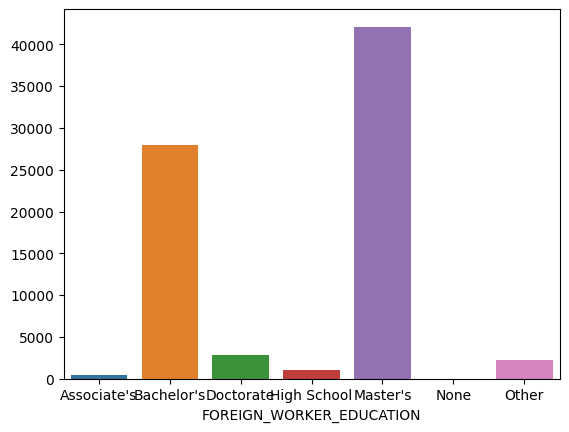

In [35]:
result = df.groupby(["FOREIGN_WORKER_EDUCATION"]).size()
sns.barplot(x = result.index, y = result.values)

<AxesSubplot:xlabel='CASE_STATUS'>

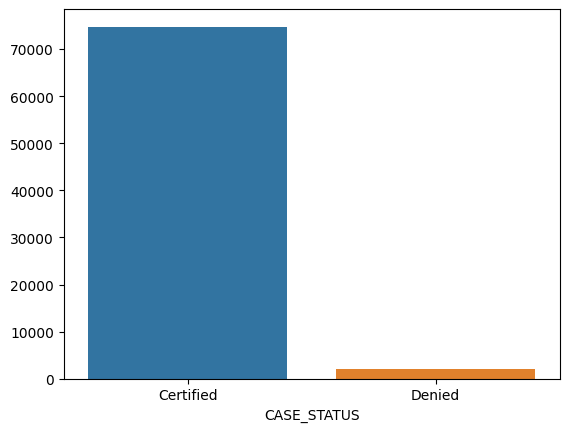

In [36]:
result = df.groupby(["CASE_STATUS"]).size()
sns.barplot(x = result.index, y = result.values)

<AxesSubplot:xlabel='FOREIGN_WORKER_BIRTH_COUNTRY'>

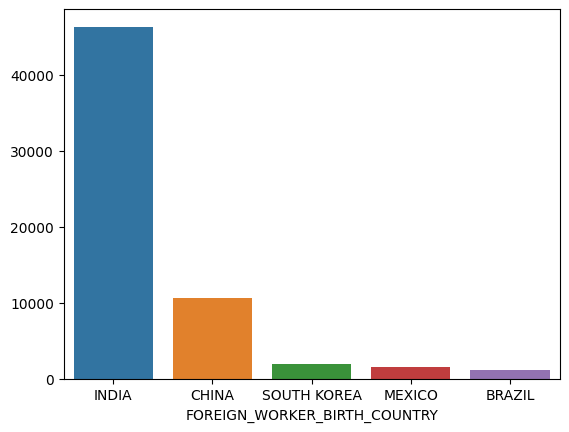

In [37]:
result = df.groupby(["FOREIGN_WORKER_BIRTH_COUNTRY"]).size().sort_values(ascending=False).head(5)
sns.barplot(x = result.index, y = result.values)

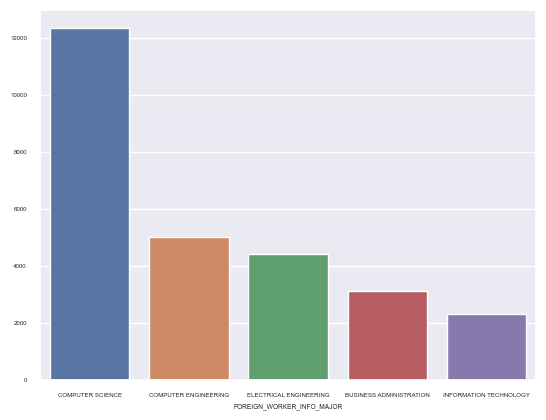

In [38]:
result = df.groupby(["FOREIGN_WORKER_INFO_MAJOR"]).size().sort_values(ascending=False).head(5)
sns.set(font_scale=0.4)
result_plot = sns.barplot(x = result.index, y = result.values,)

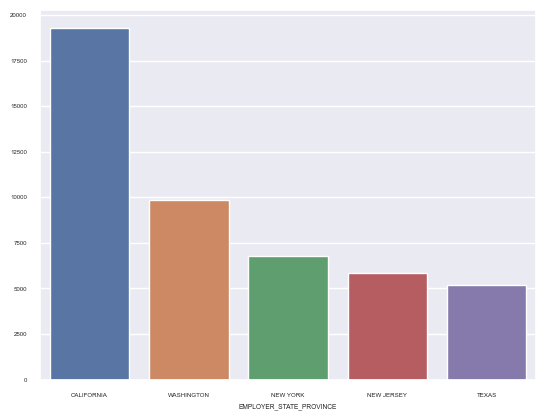

In [39]:
result = df.groupby(["EMPLOYER_STATE_PROVINCE"]).size().sort_values(ascending=False).head(5)
result_plot = sns.barplot(x = result.index, y = result.values,)

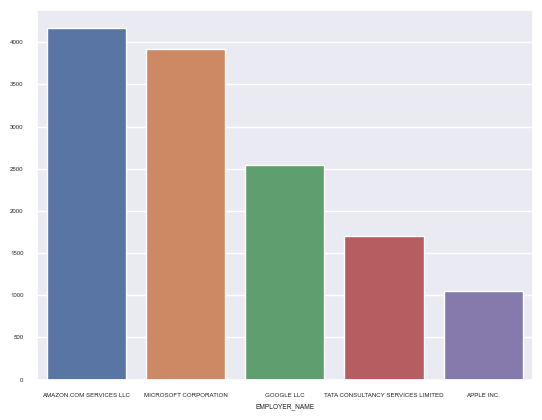

In [40]:
result = df.groupby(["EMPLOYER_NAME"]).size().sort_values(ascending=False).head(5)
sns.set(font_scale=0.4)
result_plot = sns.barplot(x = result.index, y = result.values,)

<AxesSubplot:xlabel='FOREIGN_WORKER_BIRTH_COUNTRY'>

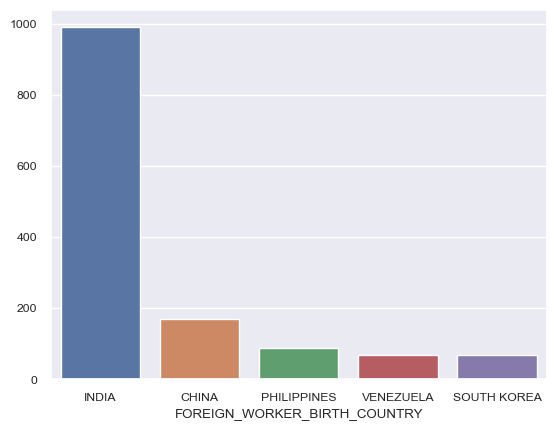

In [41]:
result = df.loc[df["CASE_STATUS"] == "Denied"].groupby(["FOREIGN_WORKER_BIRTH_COUNTRY"]).size().sort_values(ascending=False).head(5)
sns.set(font_scale=0.8)
sns.barplot(x = result.index, y = result.values)

<AxesSubplot:xlabel='EMPLOYER_NAME'>

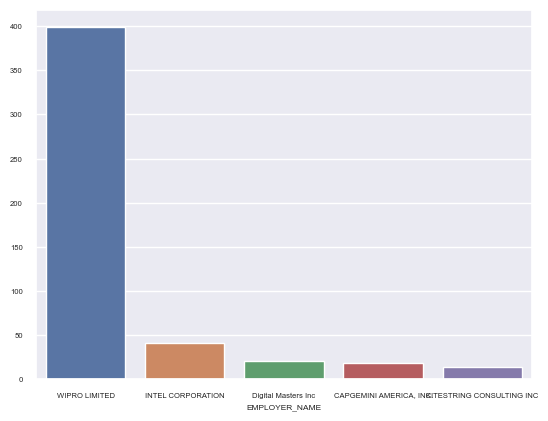

In [42]:
result = df.loc[df["CASE_STATUS"] == "Denied"].groupby(["EMPLOYER_NAME"]).size().sort_values(ascending=False).head(5)
sns.set(font_scale=0.5)
sns.barplot(x = result.index, y = result.values)

<AxesSubplot:xlabel='CLASS_OF_ADMISSION'>

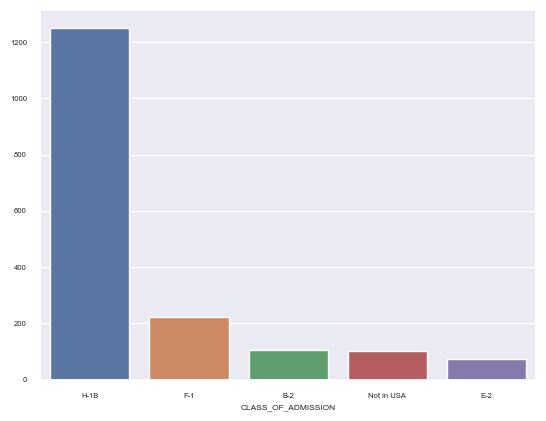

In [43]:

result = df.loc[df["CASE_STATUS"] == "Denied"].groupby(["CLASS_OF_ADMISSION"]).size().sort_values(ascending=False).head(5)
sns.set(font_scale=0.5)
sns.barplot(x = result.index, y = result.values)

<AxesSubplot:xlabel='EMPLOYER_NAME'>

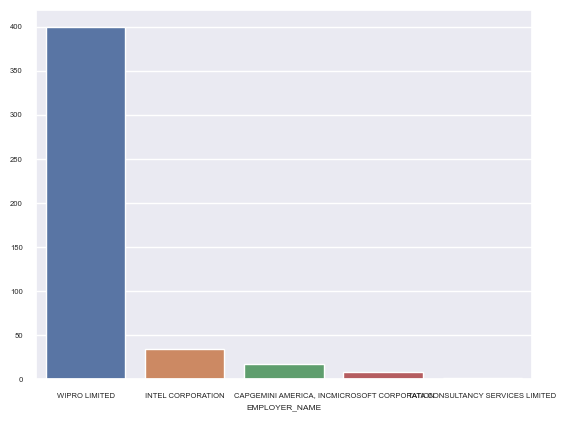

In [47]:
result = df.loc[(df["CASE_STATUS"] == "Denied") & (df["LAYOFF_IN_PAST_SIX_MONTHS"] == "Y")].groupby(["EMPLOYER_NAME"]).size().sort_values(ascending=False).head(5)
sns.set(font_scale=0.5)
sns.barplot(x = result.index, y = result.values)

In [ ]:
result = df.loc[df["CASE_STATUS"] == "Denied"].groupby(["EMPLOYER_STATE_PROVINCE"]).size().sort_values(ascending=False).head(5)
sns.set(font_scale=0.5)
sns.barplot(x = result.index, y = result.values)

# PREDICTION

In [ ]:
#df['col2'] = df['col2'].astype('category')
features = ["EMPLOYER_NAME","EMPLOYER_STATE_PROVINCE","EMPLOYER_NUM_EMPLOYEES",
          "PW_SOC_TITLE","PW_SKILL_LEVEL",
         "LAYOFF_IN_PAST_SIX_MONTHS","FOREIGN_WORKER_BIRTH_COUNTRY",
          "CLASS_OF_ADMISSION",
          "FOREIGN_WORKER_EDUCATION",
         "YEARLY_RATE"]
dff = df[features] 

In [ ]:
dff

In [ ]:
dff.dtypes

In [ ]:
dff['PW_SKILL_LEVEL'] = dff['PW_SKILL_LEVEL'].astype('float64')

In [ ]:
dff.dtypes

In [ ]:
dff.loc[dff["LAYOFF_IN_PAST_SIX_MONTHS"] == "Y", "LAYOFF_IN_PAST_SIX_MONTHS"] = 1
dff.loc[dff["LAYOFF_IN_PAST_SIX_MONTHS"] == "N", "LAYOFF_IN_PAST_SIX_MONTHS"] = 0
dff['LAYOFF_IN_PAST_SIX_MONTHS'] = dff['LAYOFF_IN_PAST_SIX_MONTHS'].astype('int32')

In [ ]:
dff

In [ ]:
dff.dtypes

In [ ]:
dff['EMPLOYER_NAME'] = dff['EMPLOYER_NAME'].astype('category')
dff['EMPLOYER_STATE_PROVINCE'] = dff['EMPLOYER_STATE_PROVINCE'].astype('category')
dff['PW_SOC_TITLE'] = dff['PW_SOC_TITLE'].astype('category')
dff['FOREIGN_WORKER_BIRTH_COUNTRY'] = dff['FOREIGN_WORKER_BIRTH_COUNTRY'].astype('category')
dff['CLASS_OF_ADMISSION'] = dff['CLASS_OF_ADMISSION'].astype('category')
dff['FOREIGN_WORKER_EDUCATION'] = dff['FOREIGN_WORKER_EDUCATION'].astype('category')

In [ ]:
PROVINCES = pd.get_dummies(dff[['EMPLOYER_STATE_PROVINCE']])
EMPLOYER = pd.get_dummies(dff[['EMPLOYER_NAME']])
TITLE = pd.get_dummies(dff[['PW_SOC_TITLE']])
BIRTH = pd.get_dummies(dff[['FOREIGN_WORKER_BIRTH_COUNTRY']])
ADMISSION = pd.get_dummies(dff[['CLASS_OF_ADMISSION']])
EDUCATION = pd.get_dummies(dff[['FOREIGN_WORKER_EDUCATION']])

In [ ]:
Y = df["CASE_STATUS"]
X = dff[["EMPLOYER_NUM_EMPLOYEES","PW_SKILL_LEVEL","LAYOFF_IN_PAST_SIX_MONTHS","YEARLY_RATE"]]
X = pd.concat([X, BIRTH,ADMISSION,EDUCATION], axis=1)

In [ ]:
X1 = dff[["EMPLOYER_NUM_EMPLOYEES","PW_SKILL_LEVEL","LAYOFF_IN_PAST_SIX_MONTHS","YEARLY_RATE"]]
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X1, Y)

_ = tree.plot_tree(dtree, feature_names=features)
plt.figure(figsize=(40,20))  
plt.show()

In [ ]:
X3 = dff[["PW_SKILL_LEVEL","LAYOFF_IN_PAST_SIX_MONTHS",]]
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X3, Y)

_ = tree.plot_tree(dtree, feature_names=features)
plt.figure(figsize=(5,3))  
plt.show()

In [ ]:
dtree.predict([[3,1]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
logreg = linear_model.LogisticRegression()
logreg.fit(X_train, y_train)

In [ ]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
# confusion_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay.from_estimator(
        logreg,
        X_test,
        y_test,
        display_labels=["CERTFIED",'DENIED'],
        cmap=plt.cm.Blues,
    )


plt.show()

In [ ]:
df.loc[df["CASE_STATUS"] == "Denied", "CASE_STATUS"] = 0
df.loc[df["CASE_STATUS"] == "Certified", "CASE_STATUS"] = 1
Y1 = df["CASE_STATUS"]

In [ ]:
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, Y1, test_size=0.3, random_state=0)

scaler = StandardScaler()
# Fit only on X_train
scaler.fit(X_train)

# Scale both X_train and X_test
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor(n_neighbors=5)
regressor.fit(X_train, y_train)

In [ ]:
y_pred = regressor.predict(X_test)

#Now we check for teh accuracy of the model with the mean absolute error, mean square error, root mean square error

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f'mae: {mae}')
print(f'mse: {mse}')
print(f'rmse: {rmse}')